In [26]:
import numpy as np
import pandas as pd
from framework.train import train_model
from framework.preprocess import load_data, preprocess_data
from framework.pca import apply_existing_pca, visualize_pca_explained_variance
from framework.evaluation import classification_report
from framework.hyperparameter_search import HyperparameterSearch

In [27]:
gesture_map = {
    "swipe_left": 0,
    "swipe_right": 1,
    "rotate": 2,
    "idle": 3,
    "flip_table": 4, 
    "point": 5,
    "zoom_in": 6,
    "zoom_out": 7
    }

In [28]:
# Load raw training and validation data from separate folders.
train_mandatory_df = load_data(data_dir="data/mandatory/train")
train_optional_df = load_data(data_dir="data/optional/train")

val_mandatory_df = load_data(data_dir="data/mandatory/validation")
val_optional_df = load_data(data_dir="data/optional/validation")

combined_train_df = pd.concat([train_mandatory_df, train_optional_df], ignore_index=True)
combined_val_df = pd.concat([val_mandatory_df, val_optional_df], ignore_index=True)

# Set PCA parameter (e.g., capture 99.9% of variance).
components_or_variance = 0.999  
# Preprocess training data and fit PCA.
X_train, y_train, pca_params_train = preprocess_data(
    combined_train_df, 
    components_or_variance=components_or_variance, 
    gesture_map=gesture_map
)

# Preprocess validation data (without PCA), then apply the PCA transformation.
X_val, y_val, _ = preprocess_data(
    combined_val_df, 
    components_or_variance=None, 
    gesture_map=gesture_map
)

X_val = apply_existing_pca(X_val, pca_params_train)

input_size = X_val.shape[1]
print(f"Input size (number of features): {input_size}")

Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_s

In [29]:
trained_model, history = train_model(
        X_train, y_train, X_val, y_val,
        epochs=50,
        batch_size=32,
        learning_rate=0.01,
        hidden_dim=[64, 64, 32],  
        n_layers=3,
        reg_lambda=0.001,
        loss_function="cross_entropy",
        pca_params=pca_params_train  
    )

PCA parameters saved to models/pca_params.pkl
PCA parameters saved to models/pca_params.pkl
Epoch 1/50 - Loss: 1.3633 - Train Acc: 0.7121 - Val Acc: 0.7096
Epoch 2/50 - Loss: 1.0264 - Train Acc: 0.7547 - Val Acc: 0.7332
Epoch 3/50 - Loss: 0.8908 - Train Acc: 0.7727 - Val Acc: 0.7543
Epoch 4/50 - Loss: 0.8047 - Train Acc: 0.7917 - Val Acc: 0.7623
Epoch 5/50 - Loss: 0.7494 - Train Acc: 0.7997 - Val Acc: 0.7708
Epoch 6/50 - Loss: 0.7126 - Train Acc: 0.8074 - Val Acc: 0.7781
Epoch 7/50 - Loss: 0.6872 - Train Acc: 0.8220 - Val Acc: 0.7857
Epoch 8/50 - Loss: 0.6678 - Train Acc: 0.8288 - Val Acc: 0.7931
Epoch 9/50 - Loss: 0.6521 - Train Acc: 0.8321 - Val Acc: 0.7803
Epoch 10/50 - Loss: 0.6382 - Train Acc: 0.8238 - Val Acc: 0.7951
Epoch 11/50 - Loss: 0.6266 - Train Acc: 0.8366 - Val Acc: 0.7979
Epoch 12/50 - Loss: 0.6171 - Train Acc: 0.8319 - Val Acc: 0.8020
Epoch 13/50 - Loss: 0.6093 - Train Acc: 0.8498 - Val Acc: 0.8091
Epoch 14/50 - Loss: 0.6016 - Train Acc: 0.8533 - Val Acc: 0.8092
Epoch 1

Info: 5254 rows did not match expected gestures; assigning them as 'idle'.
Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', '

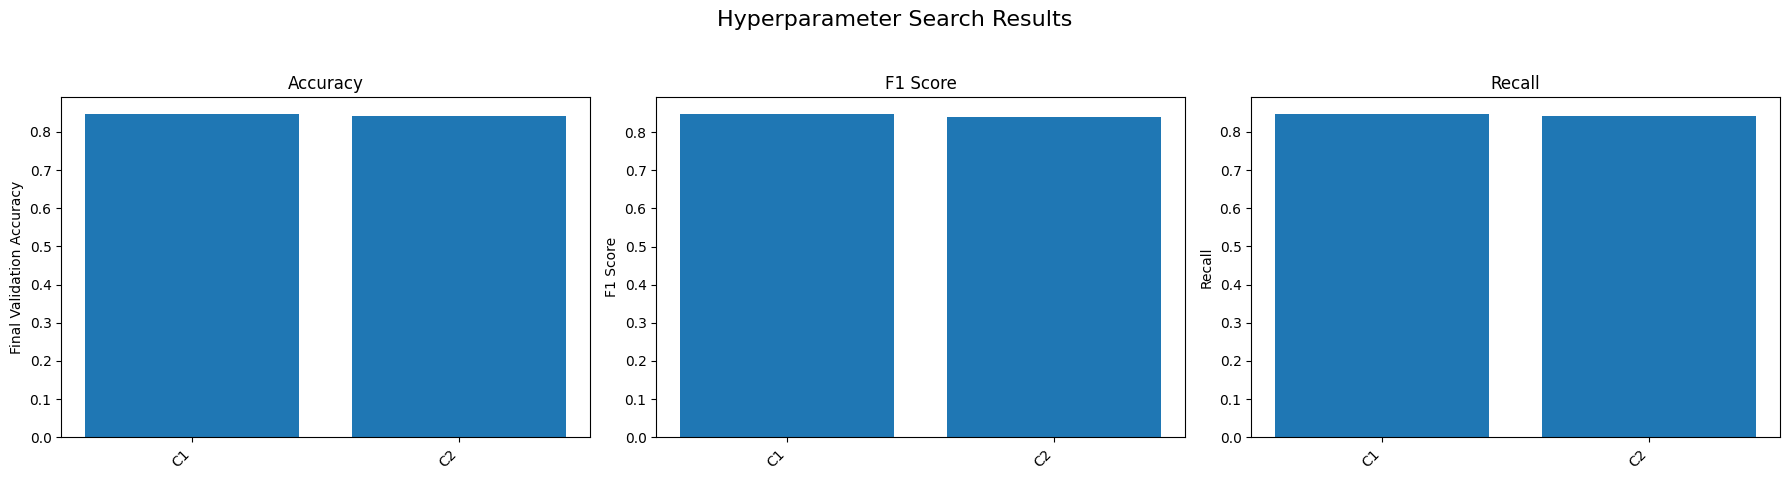

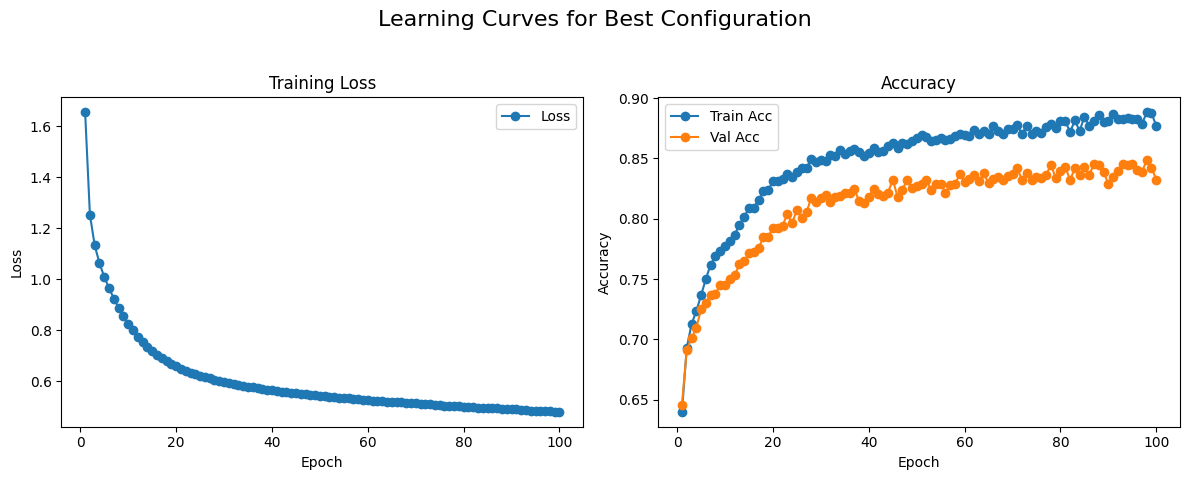

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'hidden_dim': [[64, 64, 32]],
    'reg_lambda': [0.001],
    'epochs': [100],
    'n_layers': [2],
    'loss_function': ['cross_entropy'],
    'batch_size': [64]
}

# Create a HyperparameterSearch object.
searcher = HyperparameterSearch(
    param_grid, 
    epochs=50, 
    batch_size=32, 
    components_or_variance=components_or_variance, 
    df=combined_train_df
)

searcher.X_train = X_train
searcher.y_train = y_train
searcher.X_val = X_val
searcher.y_val = y_val
searcher.pca_params = pca_params_train

searcher.search()

best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")

searcher.plot_results()
searcher.plot_best_history()

In [32]:
best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")


Best hyperparameter configuration:
n_layers                                                          2
hidden_layers                                          [64, 64, 32]
learning_rate                                                  0.01
n_epochs                                                        100
loss_function                                         cross_entropy
reg_lambda                                                    0.001
batch_size                                                       64
Score                                                          None
Accuracy                                                   0.848395
F1                                                         0.848782
Precision                                                  0.854534
Recall                                                     0.848395
train_accuracy                                             0.877031
train_loss                                                   0.4804
history      

Generating classification report for the trained model...
Classification Report:
----------------------
Accuracy:  0.8343
Precision: 0.8499
Recall:    0.8343
F1 Score:  0.8304
Confusion Matrix:
[[ 436    0    0   81    0   23    0    0]
 [  50  417    9  158    1    0    0    0]
 [   0    0  140   83    0    0    0    0]
 [   3   15    1 2621    0    0   50   46]
 [   0    0    0   90  350    5    0    0]
 [  54    0    0  142    0  344    0    0]
 [   0    0    0   28    0    0  105   13]
 [   0    0    0   36    0    0    5   83]]


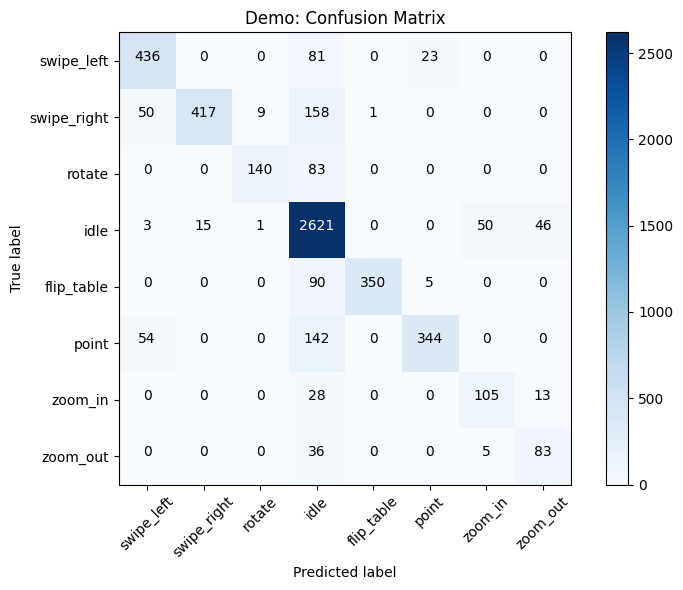

Classification Report: {'accuracy': 0.834292076452032, 'precision': 0.84988430168319, 'recall': 0.834292076452032, 'f1': 0.8304249985061535, 'confusion_matrix': array([[ 436,    0,    0,   81,    0,   23,    0,    0],
       [  50,  417,    9,  158,    1,    0,    0,    0],
       [   0,    0,  140,   83,    0,    0,    0,    0],
       [   3,   15,    1, 2621,    0,    0,   50,   46],
       [   0,    0,    0,   90,  350,    5,    0,    0],
       [  54,    0,    0,  142,    0,  344,    0,    0],
       [   0,    0,    0,   28,    0,    0,  105,   13],
       [   0,    0,    0,   36,    0,    0,    5,   83]]), 'labels': ['swipe_left', 'swipe_right', 'rotate', 'idle', 'flip_table', 'point', 'zoom_in', 'zoom_out']}


In [33]:
LABEL_TO_GESTURE = {
    0: "swipe_left", 
    1: "swipe_right", 
    2: "rotate", 
    3: "idle", 
    4: "flip_table", 
    5: "point",
    6: "zoom_in",
    7: "zoom_out",
}
# Generate predictions for the validation set.
val_preds = trained_model.predict(X_val)

# Generate and display the classification report (with confusion matrix visualization).
print("Generating classification report for the trained model...")
report = classification_report(
    y_true=y_val, 
    y_pred=val_preds, 
    label_mapping=LABEL_TO_GESTURE, 
    visualize_cm=True, 
    title="Demo: Confusion Matrix"
)
print("Classification Report:", report)